In [2]:
import pandas as pd

In [3]:
# Загружаем данные в переменную df из файла homework.csv

In [4]:
df = pd.read_csv("homework.csv")

In [5]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


**"Бостонский набор"** включает в себя следующие характеристики:

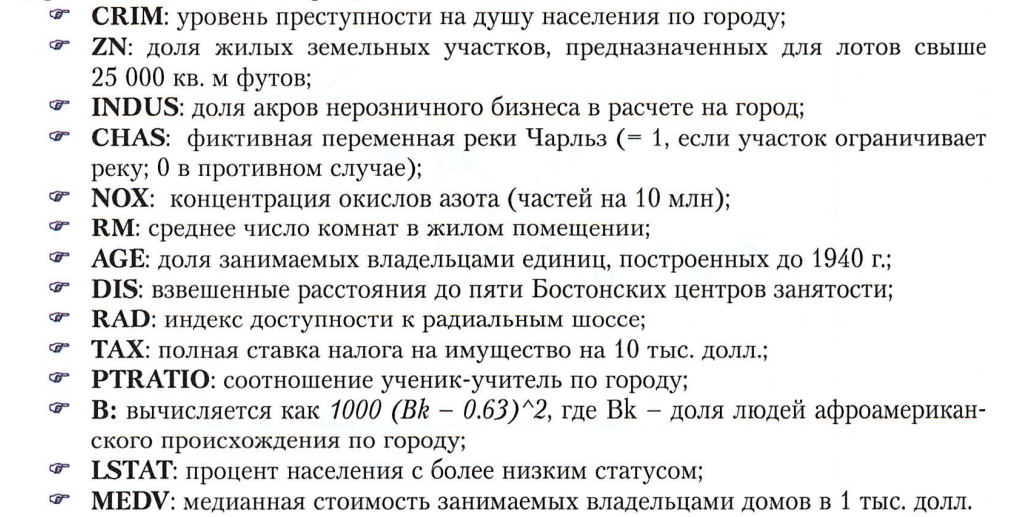

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


**Вывод:** Пропусков в данных не имеется. Типы данных представлены числовыми величинами, что позволяет применить модель линейной регрессии без каких-либо дополнительных преобразований.

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Построить scatter график по параметрам crim, medv

**Диаграмма рассеяния зависимости между стоимостью жилья и уровнем преступности**


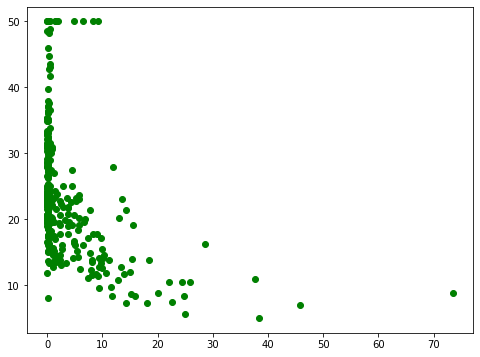

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(df['crim'], df['medv'], color='green')
'''df.plot(kind='scatter', 
        x='crim', 
        y='medv', 
        title='Зависимость между crim и medv')
'''        
plt.show()

In [10]:
# Построить scatter график по параметрам rm, medv

**Диаграмма рассеяния зависимости между стоимостью жилья и количеством комнат**

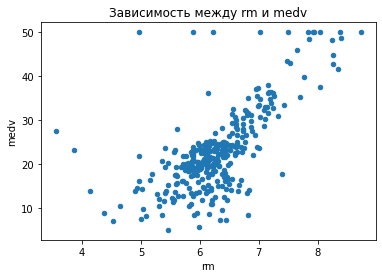

In [11]:
df.plot(kind='scatter', 
        x='rm', 
        y='medv', 
        title='Зависимость между rm и medv')


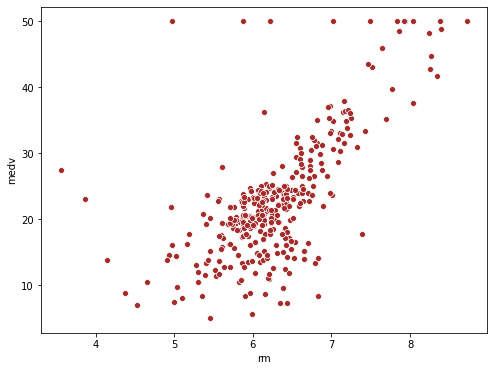

In [12]:
# Можно через seaborn
import seaborn as sns
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='rm', y='medv', color='brown')

Как отмечает Себастьян Рашка в монографии "Python и машинное обучение"  // Рашка С. 
Р28  Python и машинное обучение /  пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017. - 418 с.: ил. :

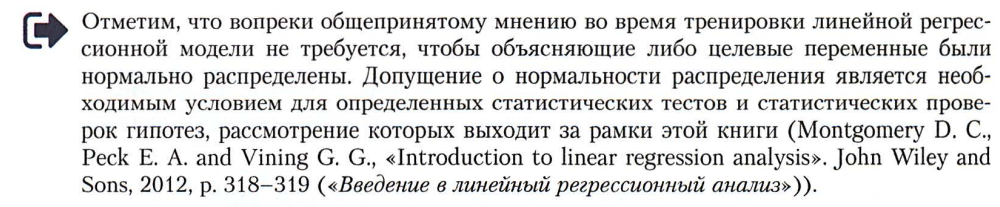

*Для лучшего качества модели на первоначальном этапе необходимо отобрать релевантные переменные используя матрицу корреляции*

https://loginom.ru/blog/feature-selection?ysclid=lenx21wgk4901006278

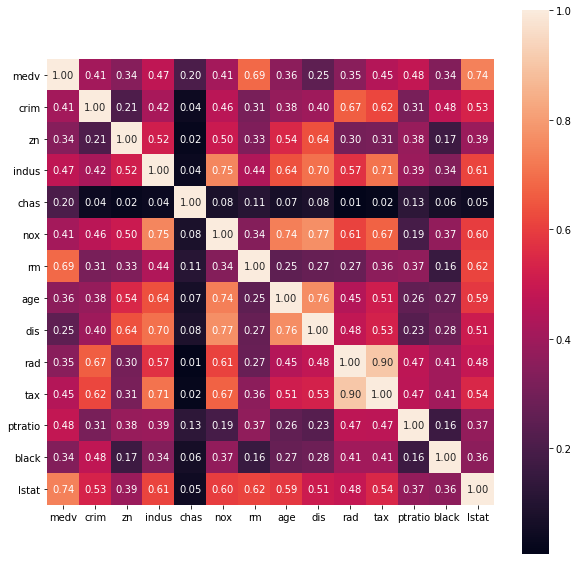

In [68]:
import numpy as np 

cols  =  ['medv','crim', 'zn', 'indus',
          'chas', 'nox', 'rm', 'age', 
          'dis', 'rad', 'tax', 
          'ptratio', 'black', 'lstat']

corr_matrix = np.corrcoef(df[cols] .values.T) 
#sns.set(font_scale=l.5) 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
# Для декоративных функций выведем тепловую карту с абсолютными значениями:
corr_matrix_abs = np.absolute(corr_matrix)
hm  = sns.heatmap(corr_matrix_abs, 
cbar=True, 
annot=True,
square=True, 
fmt='.2f', 
annot_kws={'size': 10}, 
yticklabels=cols, 
xticklabels=cols)

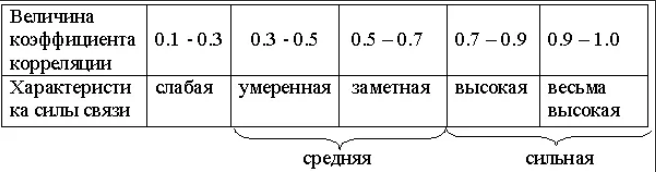

**Вывод:** Используя представленную выше матрицу коэффициентов корреляции и уровни градаций коэфициента корреляции определим что для прогнозного показателя модели **MEDV** -медианной стоимости недвижимости в тыс. долларов  можно исключить описательные показатели  **DIS** (обобщенное расстояние до центров занятости) и **CHAS** (расположение недвижимости относительно реки Чарльз). 

In [24]:
cols  =  ['crim', 'zn', 'indus',
           'nox', 'rm', 'age', 
           'rad', 'tax', 
           'ptratio', 'black', 'lstat']

So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [26]:
# Сформировать X и y из df, выбрав нужные колонки
X = df[cols]
y = df['medv']

**Предсказать значение столбца MEDV на основе других признаков**

In [ ]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

*Разделим данные на обучающую и тестовую выборки в пропорции 70% и 30%*

In [ ]:
# Разбить данные на данные для обучения и проверки

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Проверим размерности выборок:

In [30]:
print(X_train.shape)
print(X_test.shape)

(233, 11)
(100, 11)


In [31]:
print(y_train.shape)
print(y_test.shape)

(233,)
(100,)


Обучим модель:

In [ ]:
# Создать и обучить модель LinearRegression

In [32]:
from  sklearn.linear_model import LinearRegression 
model =  LinearRegression() 
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

Посмотрим коэффициенты регрессионной модели:

In [33]:
model.coef_

array([-0.05177225,  0.01579678,  0.12364711, -7.20149684,  3.93056885,
        0.03243424,  0.48774471, -0.02039243, -0.93418   ,  0.00865811,
       -0.62790032])

и остаток:

In [34]:
model.intercept_

24.253797490099867

Оценим полученное качество модели:

In [36]:
y_train_pred = model.predict(X_train) 
y_test_pred = model.predict(X_test) 

Посмотрим как модель работает на тестовой выборке:

In [85]:
i = 0
for index_, y_test_val in y_test.items():
   
    print(f'{i+1:2d}. Реальное значение: {y_test_val:4.1f} тыс.$ \
cмоделированное значение: {y_test_pred[i]:4.1f} тыс.$ \
расхождение в {((y_test_pred[i]/y_test_val)-1)*100:4.1f} %')
    i += 1

 1. Реальное значение: 24.7 тыс.$ cмоделированное значение: 25.2 тыс.$ расхождение в  2.1 %
 2. Реальное значение: 19.6 тыс.$ cмоделированное значение: 24.5 тыс.$ расхождение в 24.9 %
 3. Реальное значение: 19.8 тыс.$ cмоделированное значение: 21.0 тыс.$ расхождение в  5.8 %
 4. Реальное значение: 27.9 тыс.$ cмоделированное значение: 29.5 тыс.$ расхождение в  5.7 %
 5. Реальное значение: 23.9 тыс.$ cмоделированное значение: 24.8 тыс.$ расхождение в  3.7 %
 6. Реальное значение: 13.5 тыс.$ cмоделированное значение: 15.5 тыс.$ расхождение в 14.9 %
 7. Реальное значение: 11.7 тыс.$ cмоделированное значение: 18.7 тыс.$ расхождение в 60.0 %
 8. Реальное значение: 30.7 тыс.$ cмоделированное значение: 29.6 тыс.$ расхождение в -3.5 %
 9. Реальное значение: 17.8 тыс.$ cмоделированное значение: 17.9 тыс.$ расхождение в  0.7 %
10. Реальное значение: 27.1 тыс.$ cмоделированное значение: 30.1 тыс.$ расхождение в 11.0 %
11. Реальное значение: 22.8 тыс.$ cмоделированное значение: 25.1 тыс.$ расхожден

**Вывод:** При оценке "на глаз" есть как удачные предсказания например строки 1, 13, 85, 100 так и откровенно провальные - например строки 28, 56, 38. Необходимо применить метрики оценки качества модели и визуализации чтобы понимать общую картину.

In [43]:
from sklearn.metrics import mean_squared_error 
MSE_train = mean_squared_error(y_train, y_train_pred) 
MSE_test  = mean_squared_error(y_test,  y_test_pred) 

print(f'MSE тренировка:  {MSE_train:5.2f},  тестирование: {MSE_test:5.2f}') 

MSE тренировка:  28.43,  тестирование: 20.41


**Вывод:** Что покажет MSE???

In [ ]:
# Оценить качество на тестовой выборки

Коэффициент детерминации полученной модели:

In [44]:
model.score(X_test, y_test)

0.7337585150219286

In [50]:
from  sklearn.metrics  import r2_score 
R2_train =r2_score(y_train,  y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
print(f'R2 тренировка: {R2_train:.3f},  тестирование: {R2_test:.3f}') 


R2 тренировка: 0.672,  тестирование: 0.734


**Вывод:** для тестовой выборки модель показывет высокий коэффициент детерминации, т.е. 73% изменчивости зависимого выходного атрибута -  цены недвижимости может быть объяснено моделью, в то время как остальные 27% изменчивости все еще не учтены. Переобучения модели не наблюдается, поскольку для тренировочной последовательности коэффициент детерминации ниже, чем для тестовой модели.

Отобразим график остатков: 

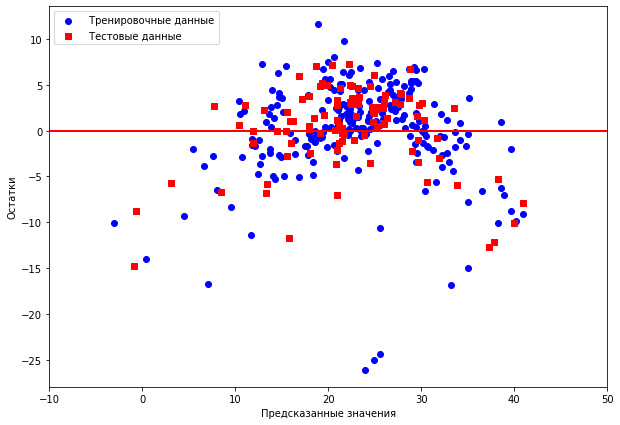

In [66]:
# Основа кода (с) С. Рашка:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
plt.scatter(y_train_pred, y_train_pred - y_train, color='blue',  marker='o',  label=' Тренировочные данные' ) 
plt.scatter(y_test_pred, y_test_pred - y_test, color='red',  marker='s',  label=' Тестовые данные') 

ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Остатки')


plt.legend(loc='upper left') 
plt.hlines(y=0,  xmin=-10,  xmax=50,  lw=2, color='red') 
plt.xlim( [-10,  50])

plt.show () 

**Вывод:** Ситуация для тестовых данных выглядит предпочтительнее, что наглядно подтверждает разницу
в коэффициентах детерминации для обучающей и тестовой выборок.

Попробуем перейти на новый уровень сложности хотя бы частично выполнив показанное в https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/notebook

In [86]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)





min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

NameError: name 'preprocessing' is not defined